In [1]:
from rhyme_rus.utils.sounds_statistics import SoundsStatistics
from rhyme_rus.utils.nn_usage import NnUsage
from timeit import default_timer as timer
from pathlib import Path
import json
import dill
import re
from slugify import slugify
from rhyme_rus.rhyme import rhyme, rhyme_with_stressed_word
import matplotlib.pyplot as plt 
from wiktionary_rus.wiktionary import wiki_instances 


Parsed wiktionary uploaded successfully
Trained Model uploaded successfully
Trained Model uploaded successfully


# df_n_vowels_after_stress

In [2]:
df_n_vowels_after_stress= SoundsStatistics.make_df_n_vowels_after_stress()
df_n_vowels_after_stress

,vowels,sounds,freq
0,8,17,1
1,7,17,1
2,7,16,4
3,6,16,5
4,8,15,1
5,7,15,4
6,5,15,16
7,6,15,29
8,7,14,2
9,4,14,3


In [3]:
longs = SoundsStatistics.get_items_by_n_vowels_after_stress(5,12,10,False)
longs

[("заи'мствование", 'zɐˈimstvəvənʲɪje'),
 ("поже'ртвование", 'pɐˈʐɛrtvəvənʲɪje'),
 ("отта'лкивающий", 'ɐˈtːaɫkʲɪvəjʉɕːɪj'),
 ("отта'лкивающий", 'ɐˈtːaɫkʲɪvəjʉɕːɪj'),
 ("самопоже'ртвование", 'səməpɐˈʐɛrtvəvənʲɪje'),
 ("кровоостана'вливающий", 'krəvɐɐstɐˈnavlʲɪvəjʉɕːɪj'),
 ("исче'рпывающий", 'ɪɕˈt͡ɕerpɨvəjʉɕːɪj'),
 ("исче'рпывающий", 'ɪɕˈt͡ɕerpɨvəjʉɕːɪj'),
 ("устана'вливаемый", 'ʊstɐˈnavlʲɪvəjɪmɨj'),
 ("обезво'живаемость", 'ɐbʲɪzˈvoʐɨvəjɪməsʲtʲ')]

In [3]:
def get_vowels_sounds_pairs(df_n_vowels_after_stress):
    length = len(df_n_vowels_after_stress)
    number_of_words = 1
    vowels_sounds_pairs = []
    for i in range(length):
        i_row = df_n_vowels_after_stress.iloc[i]
        n_vowels = i_row.vowels
        n_sounds = i_row.sounds
        vowels_sounds_pairs.append(list((n_vowels, n_sounds, number_of_words)))
    vowels_sounds_pairs.reverse()
    return vowels_sounds_pairs
vowels_sounds_pairs = get_vowels_sounds_pairs(df_n_vowels_after_stress)
vowels_sounds_pairs[:2]    
         

[[1, 1, 1], [2, 2, 1]]

In [4]:
def get_not_null_tuple(pair):
    tuple_word_sound = SoundsStatistics.get_items_by_n_vowels_after_stress(*pair)
    if (tuple_word_sound != [] 
        and tuple_word_sound[0][0].islower() 
        and "-" not in tuple_word_sound[0][0]):
        word_with_stress = tuple_word_sound[0][0]
        return word_with_stress
    return get_not_null_tuple(pair)

# make_progression_words

In [5]:
def make_progression_words(vowels_sounds_pairs, path_pw):
    path = path_pw
    if Path(path).exists():
        with open(path, "rb") as f:
           progression_words = dill.load(f)
           print(progression_words)
    else:
        progression_words = []
        for pair in vowels_sounds_pairs:
            word_with_stress = get_not_null_tuple(pair)
            progression = list((word_with_stress, pair[:-1]))
            print(progression)
            progression_words.append(progression)
        # one-syllabel word cannot be rhymed
        progression_words = progression_words[1:]
        
        with open(path_pw, "wb") as f:
            dill.dump(progression_words, f)
    
    return progression_words

# assess_time_of_rhyme_search

In [7]:
def assess_time_of_rhyme_search(progression_words, path_wlt):
    path = path_wlt
    if Path(path).exists():
        with open(path, "rb") as f:
            word_length_time = dill.load(f)
    else:
        data =[]
        with open(path, 'wb') as f:
            dill.dump(data, f)

        word_length_time = []
        # rhymes_output = []
        for word in progression_words:
            
            start = timer()
            output = rhyme_with_stressed_word(
                word_with_stress = word[0],
                max_length_pat_of_ipa=6,
                list_score_numbers=range(0, 45, 5),
                max_number_hard_sounds_in_one_pat=1)
            # rhymes_output.append(output) 
            end = timer()
            time_of_rhyming = end - start
            
            with open(path_wlt, 'rb') as f:
                data = dill.load(f)
            
            new_data = list((time_of_rhyming, word))
            print(new_data)   
            data.append(new_data)
            
            with open(path_wlt, 'wb') as f:
                dill.dump(data, f)
                
            word_length_time.append(new_data)
        
    return word_length_time

In [236]:
def word_length_time_comparison(vowel_sounds_pairs):
    list_word_length_time = []
    for i in range(0,5,1):
        path_pw = "progression_words_0{}.pkl".format(i)
        path_wlt = "word_length_time_0{}.pkl".format(i)
        progression_words = make_progression_words(vowels_sounds_pairs, path_pw)
        word_length_time = assess_time_of_rhyme_search(progression_words, path_wlt)
        list_word_length_time.append(word_length_time)
        
    return list_word_length_time
list_word_length_time = word_length_time_comparison(vowels_sounds_pairs)

["гаи'", [1, 1]]
["у'и", [2, 2]]
["возросла'", [1, 2]]
["маляри'и", [2, 3]]
["жире'й", [1, 3]]
["мистици'зм", [1, 4]]
["сце'ну", [2, 4]]
["актуа'рии", [3, 4]]
["госпо'дств", [1, 5]]
["сериа'лами", [3, 5]]
["простира'йте", [2, 5]]
["а'удио", [4, 5]]
["оранжере'ями", [3, 6]]
["а'урою", [4, 6]]
["мусульма'нств", [1, 6]]
["жили'щный", [2, 6]]
["приватизи'ровав", [3, 7]]
["ра'йский", [2, 7]]
["удоста'ивая", [4, 7]]
["бесчи'нством", [2, 8]]
["наты'льником", [3, 8]]
["расчё'сывала", [4, 8]]
["отста'ивании", [5, 8]]
["организо'вываюсь", [4, 9]]
["му'дрствуй", [2, 9]]
["инвести'ровании", [5, 9]]
["де'рзостях", [3, 9]]
["попредседа'тельствуй", [3, 10]]
["обша'рпываем", [4, 10]]
["се'стринств", [2, 10]]
["поса'пываете", [5, 10]]
["выстра'иваниями", [6, 11]]
["ко'нсульством", [3, 11]]
["притяга'тельностям", [4, 11]]
["неузнава'емостями", [5, 11]]
["консолиди'рованиями", [6, 12]]
["сожи'тельствовав", [4, 12]]
["сра'внивающий", [5, 12]]
["се'стринствам", [3, 12]]
["взмё'тывающийся", [6, 13]]
["вти'с

# drawing chart of word_length_time 


In [237]:
def upload_all_word_length_files(file_indexes):
    list_word_length_time = []
    for i in file_indexes:
        with open("word_length_time_0{}.pkl".format(i), "rb") as f:
            word_length_time = dill.load(f)
        list_word_length_time.append(word_length_time)
    return list_word_length_time

file_indexes = range(5)
list_word_length_time = upload_all_word_length_files(file_indexes)
list_word_length_time[0][0]

[1.0277869999990799, ["у'и", [2, 2]]]

In [238]:
def make_list_x_y(list_word_length_time):
    list_x_y =[]
    for i, word_length_time in enumerate(list_word_length_time): 
        length = len(word_length_time)
        y = [round(time[0]/60, 2) for time in word_length_time]
        x = [i for i in range(length)]
        list_x_y.append((x, y))
    return list_x_y 
list_x_y = make_list_x_y(list_word_length_time)


In [239]:
def remove_short_list_x_y(list_x_y, df_n_vowels_after_stress):
    target_len = len(df_n_vowels_after_stress)-1
    proper_list_x_y = [x_y for x_y in list_x_y if len(x_y[0]) == target_len and len(x_y[1]) == target_len]
    return proper_list_x_y
list_x_y = remove_short_list_x_y(list_x_y, df_n_vowels_after_stress)
len(list_x_y)  

5

In [240]:
def make_ticks(list_word_length_time):
    source_for_ticks = 4
    my_xticks = [(time[1][0] + " - " + str(time[1][1])) for time in list_word_length_time[source_for_ticks]]
    return my_xticks
my_xticks = make_ticks(list_word_length_time)
my_xticks[0]

"у'и - [2, 2]"

In [241]:
def calc_list_y_average(list_x_y):
    length = len(list_x_y[0][1])
    sequence_of_matching_y = []
    for i in range(length):    
        list_y = []
        for x_y in list_x_y:
            y_sequence = x_y[1]
            y = y_sequence[i]
            list_y.append(y)
        sequence_of_matching_y.append(list_y)
    list_y_average = []
    for smy in sequence_of_matching_y:
        avr = sum(smy)/len(smy)
        list_y_average.append(avr)
    
    return list_y_average
list_y_average = calc_list_y_average(list_x_y)
list_y_average[:3]   
        

[0.018, 0.018000000000000002, 0.054000000000000006]

<Axes: xlabel='word-sounds-vowels', ylabel='minutes to find rhymes'>

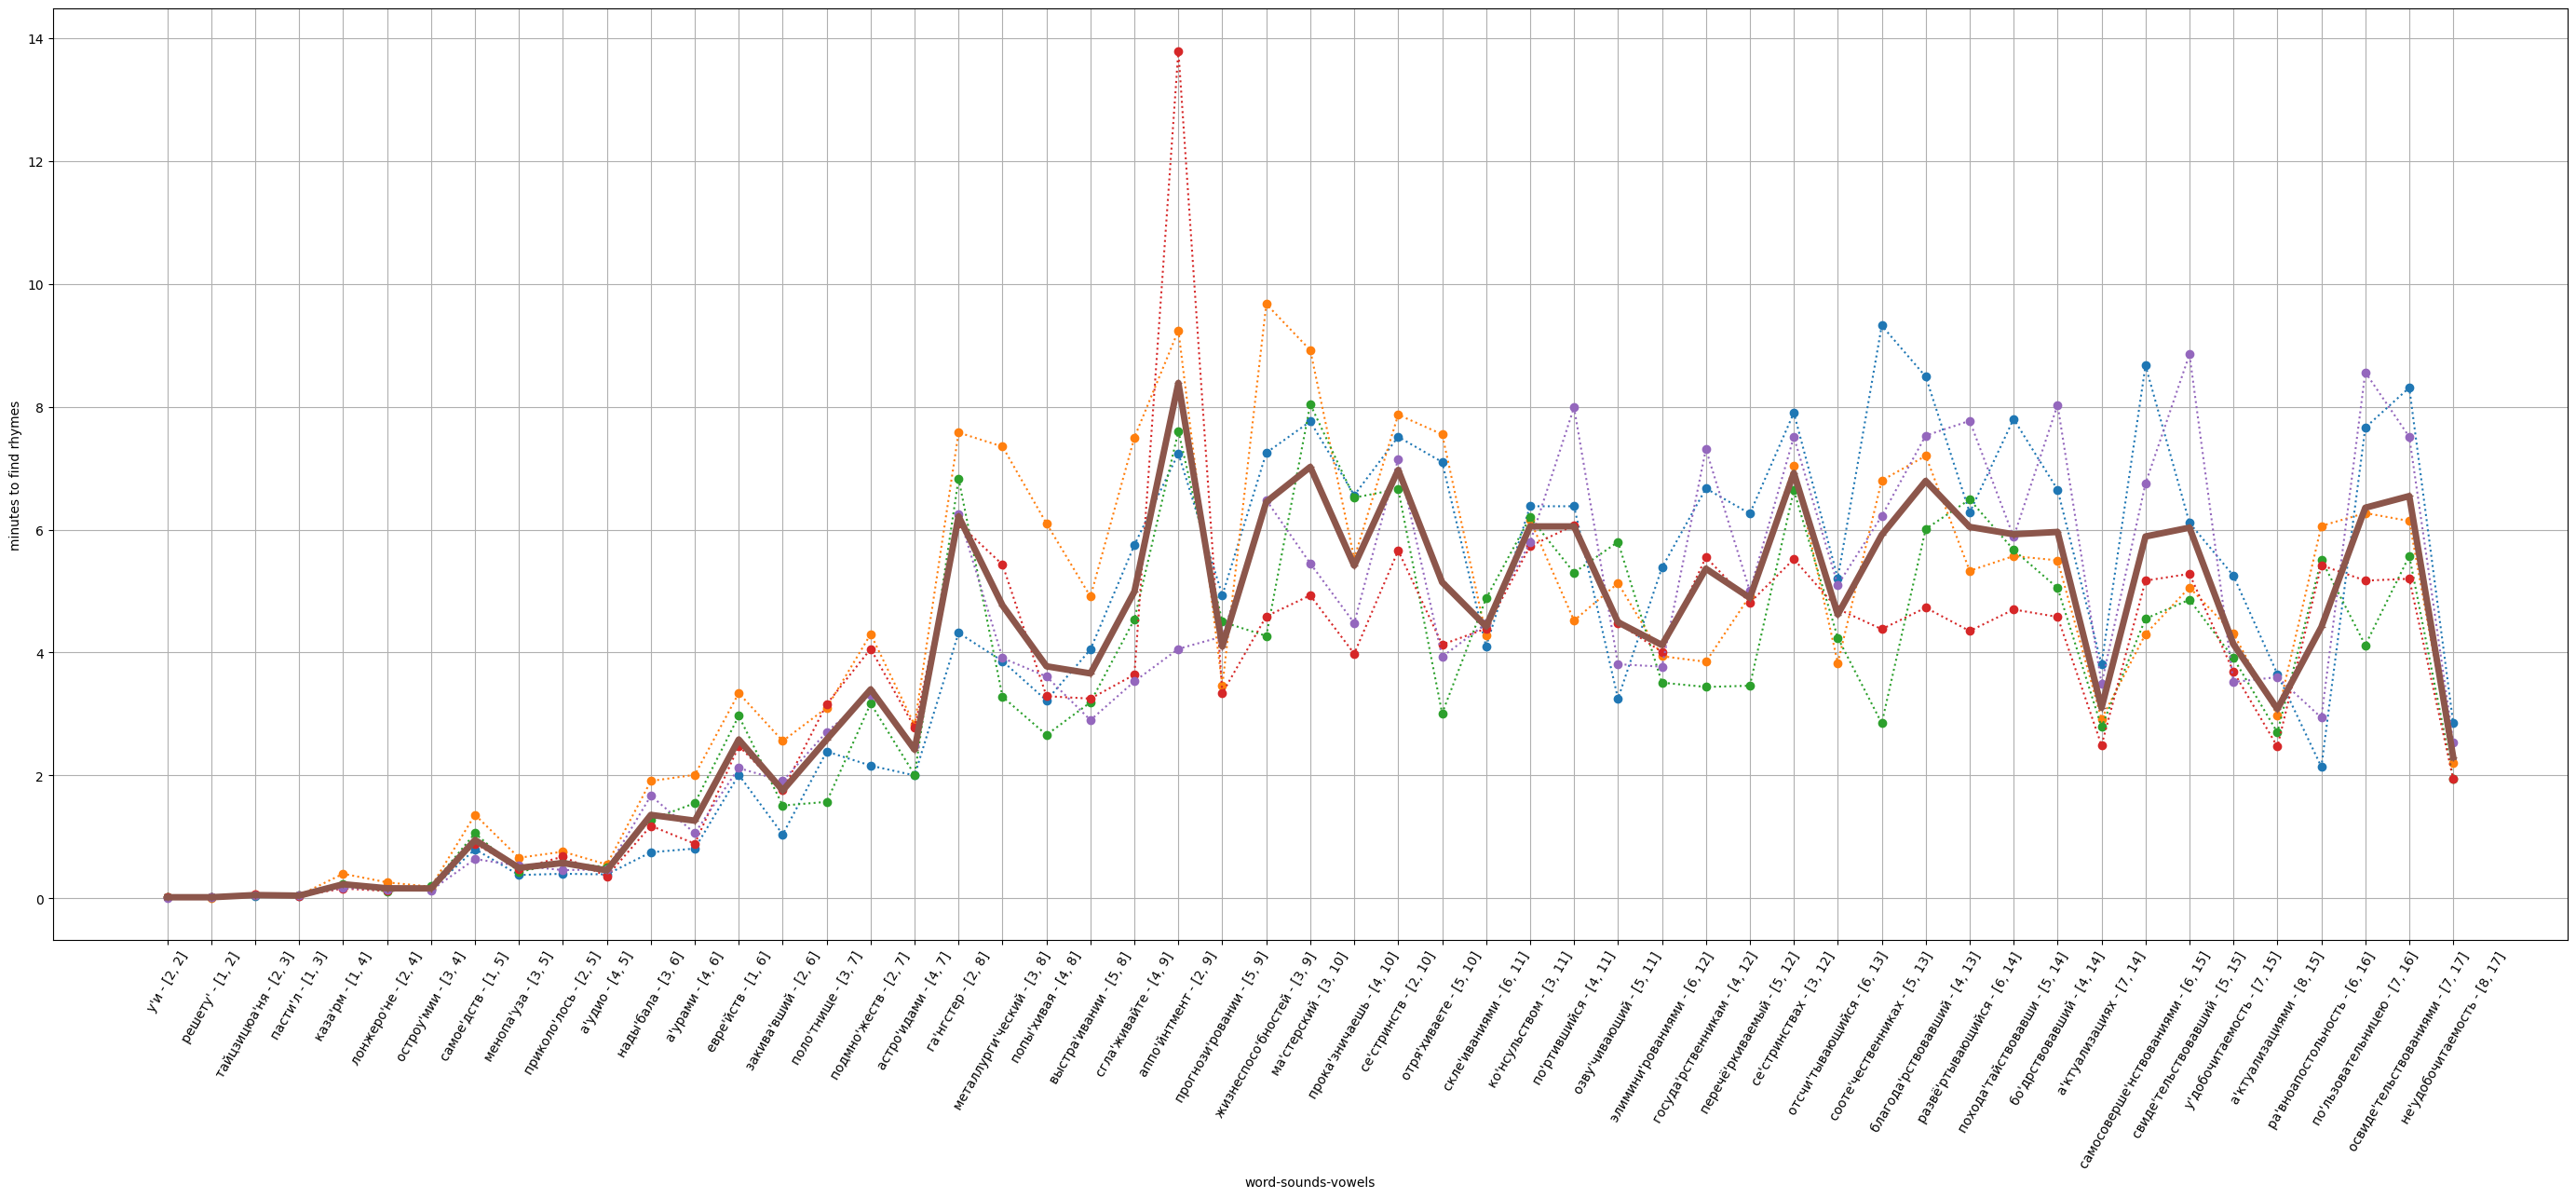

In [242]:
def draw_charts(list_x_y, my_xticks):
    fig = plt.figure(figsize=(27,10))
    ax = fig.add_axes([0,0,1,1])
    ax.grid()
    for x_y in list_x_y:
        ax.plot(x_y[0], x_y[1], marker = "o", ls = ':')
    
    list_y_average = calc_list_y_average(list_x_y)
    ax.plot(list_x_y[0][0], list_y_average, marker = "+", linewidth = '5.0')
    
    ax.set_xticks(list(range(len(my_xticks))))
    ax.set_xticklabels(my_xticks, rotation = 60)
    ax.set_xlabel("word-sounds-vowels")
    ax.set_ylabel("minutes to find rhymes")
    fig.savefig("depth_time_all.png", bbox_inches = "tight")
    
    return ax
draw_charts(list_x_y, my_xticks)

In [225]:
#6.17
start = timer()
output = rhyme("освидетельствованию")
end = timer()
total_time = end - start
print(total_time)

Algorythm reduced combinations for освиде'тельствованию down to 6 sounds after stressed vowel
Algorythm produces patterns, which include only 1 CPU-consuming parameter
Algorythm produces [0, 5, 10, 15, 20, 25, 30, 35, 40] of range(0, 105, 5) possible combinations
292.9674548999901


In [227]:
total_time/60  

4.882790914999835

# explore rhyme config vs time

# get_n_sounds_in_word_withput_stress

In [32]:
def get_n_sounds_in_word_without_stress(word_without_stress):
    n_sounds_in_word_without_stress = [len(item.intipa) for item in wiki_instances if item.word == word_without_stress]
    n_sounds_in_word_without_stress = int(n_sounds_in_word_without_stress[0])
    return n_sounds_in_word_without_stress
word_without_stress = "пожертвование"
n_sounds_in_word_without_stress = get_n_sounds_in_word_without_stress(word_without_stress)
n_sounds_in_word_without_stress

12

In [32]:
word_without_stress = "пожертвование"
print("word_without_stress", word_without_stress)
nested_list_score_numbers = [[i] for i in range(0, 45, 5)]
print("list_score",nested_list_score_numbers) 
list_max_length_pat_of_ipa = [get_n_sounds_in_word_without_stress(word_without_stress)]
print("list_max_length_pat_of_ipa", list_max_length_pat_of_ipa) 
list_max_number_hard_sounds_in_one_pat = [1]
print("list_max_number_hard_sounds_in_one_pat", list_max_number_hard_sounds_in_one_pat)

word_without_stress пожертвование
list_score [[0], [5], [10], [15], [20], [25], [30], [35], [40]]
list_max_length_pat_of_ipa [12]
list_max_number_hard_sounds_in_one_pat [1]


In [33]:
def assess_rhyme_config_vs_time(word_without_stress, 
                                list_max_length_pat_of_ipa,
                                nested_list_score_numbers, 
                                list_max_number_hard_sounds_in_one_pat)  :
    
    path_begin = slugify(word_without_stress) 
    path_time = "{}_rhyme_config_vs_time_03.pkl".format(path_begin)
    path_rhyme = "{}_rhymes_03.pkl".format(path_begin)
    
    if Path(path_time).exists() and Path(path_rhyme).exists():
        with open(path_time, "rb") as f:
            rhyme_config_vs_time = dill.load(f)
        with open(path_rhyme, "rb") as f:
            rhymes_outputs = dill.load(f)
    else:
        data = []
        with open(path_time, "wb") as f:
            dill.dump(data, f)
        with open(path_rhyme, "wb") as f:
            dill.dump(data, f)
                
        rhyme_outputs = []
        rhyme_config_vs_time = []
        for max_number_hard_sounds_in_one_pat in list_max_number_hard_sounds_in_one_pat:
            for max_length_pat_of_ipa in list_max_length_pat_of_ipa:
                for list_score_numbers in nested_list_score_numbers: 
                    start = timer()
                    output = rhyme(
                        word_without_stress = word_without_stress,
                        max_length_pat_of_ipa = max_length_pat_of_ipa,
                        list_score_numbers = list_score_numbers,
                        max_number_hard_sounds_in_one_pat = max_number_hard_sounds_in_one_pat)
                    end = timer()
                    time_of_rhyming = end - start
                    print(time_of_rhyming)
                    
                    rhyming_data = tuple((time_of_rhyming, 
                                        word_without_stress, 
                                        max_length_pat_of_ipa, 
                                        list_score_numbers, 
                                        max_number_hard_sounds_in_one_pat))

                    rhyme_outputs.append(output)
                    rhyme_config_vs_time.append(rhyming_data)

                    with open(path_time, "rb") as f:
                        _rhyme_config_vs_time = dill.load(f)
                    with open(path_rhyme, "rb") as f:
                        _rhymes_outputs = dill.load(f)
                    
                    _rhyme_config_vs_time.append(rhyming_data)           
                    _rhymes_outputs.append(output)
                    
                    with open(path_time, "wb") as f:
                        dill.dump(_rhyme_config_vs_time, f)
                    with open(path_rhyme, "wb") as f:
                        dill.dump(_rhymes_outputs, f)
                    
    return rhyme_config_vs_time, rhyme_outputs



In [ ]:
rhyme_config_vs_time, rhyme_outputs = assess_rhyme_config_vs_time(
                                    word_without_stress, 
                                    list_max_length_pat_of_ipa,
                                    nested_list_score_numbers, 
                                    list_max_number_hard_sounds_in_one_pat
                                    )

# Draw DepthVsTime

In [47]:
class DepthVsTime:

    @classmethod
    def upload_rhymes(cls, path_rhymes):
        path = path_rhymes
        if Path(path).exists():
            rhymes = []
            with open(path, "rb") as f:
                try:
                    while True:
                        rhymes.append(dill.load(f))
                except EOFError:
                    pass
        return rhymes

    @classmethod
    def upload_times(cls, path_times):
        path = path_times
        if Path(path).exists():
            times = []
            with open(path, "rb") as f:
                try:
                    while True:        
                        times.append(dill.load(f))
                except EOFError:
                    pass
        return times

    @classmethod
    def shorten_times(cls, times):
        short_times = []
        for line in times:
            if line != []:
                line = list(line)
                short_tuple = max(line[3])
                line.pop(3)
                line.insert(3, short_tuple)
                short_times.append(line)
        return short_times

    @classmethod
    def define_x_y(cls, short_times):
        y = [item[0] / 60 for item in short_times]
        x = [
            str(item[1:][0]) + ": " +
            ','.join(map(lambda x: str(x), item[1:][1:]))
            for item in short_times
        ]
        return x, y

    @classmethod
    def upload_to_x_y(cls, path_times):
        times = cls.upload_times(path_times)
        short_times = cls.shorten_times(times)
        x, y = cls.define_x_y(short_times)
        return x, y


In [12]:
path_rhymes = "rhyme_words_over_7_score_00.pkl"
rhymes = DepthVsTime.upload_rhymes(path_rhymes) 

In [78]:
rhymes[-9]

,rhymes,patterns,part_speech,score
0,ориентировавшийся,"(same_cons, same_stressed_v, no_sound, any_cons, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
1,предписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
2,приписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
3,выписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
4,расписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
5,записывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
6,переписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
7,подписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
8,вписывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20
9,описывавшийся,"(any_cons, same_stressed_v, same_cons, no_sound, any_v, same_cons, same_v, same_cons, same_cons, same_v, same_cons, same_cons, same_v)",verb,20


In [26]:
my_gen = (item for item in rhymes)


In [ ]:
next(my_gen)

In [48]:
path_times = "time_words_over_7_score_00.pkl"
times = DepthVsTime.upload_times(path_times)
times = times[1:]

In [ ]:
times

In [68]:
def draw_depth_vs_time(path_times, path_to_save):
    x, y = DepthVsTime.upload_to_x_y(path_times=path_times)
    my_xticks = [i for i in range(len(x))]
    my_xlabels = x

    fig = plt.figure(figsize=(35, 10))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x, y)
    ax.set_xticks(my_xticks)
    ax.set_xticklabels(my_xlabels, rotation=60)
    ax.grid()
    ax.set_label("rhyme patterns include all sounds of a long word")
    ax.set_xlabel("rhymes' depth")
    ax.set_ylabel("time of rhyming")
    fig.savefig("pozhertvovanie_01.png", bbox_inches="tight")
    if Path(path_to_save).exists() == False:
        fig.savefig(path_to_save, bbox_inches = 'tight')
        print(f"chart with path {path_to_save} has been created")
    else:
        print(f"chart with path {path_to_save} already exists")
    plt.show()


chart with path chart_time_words_over_7_score_00.png already exists


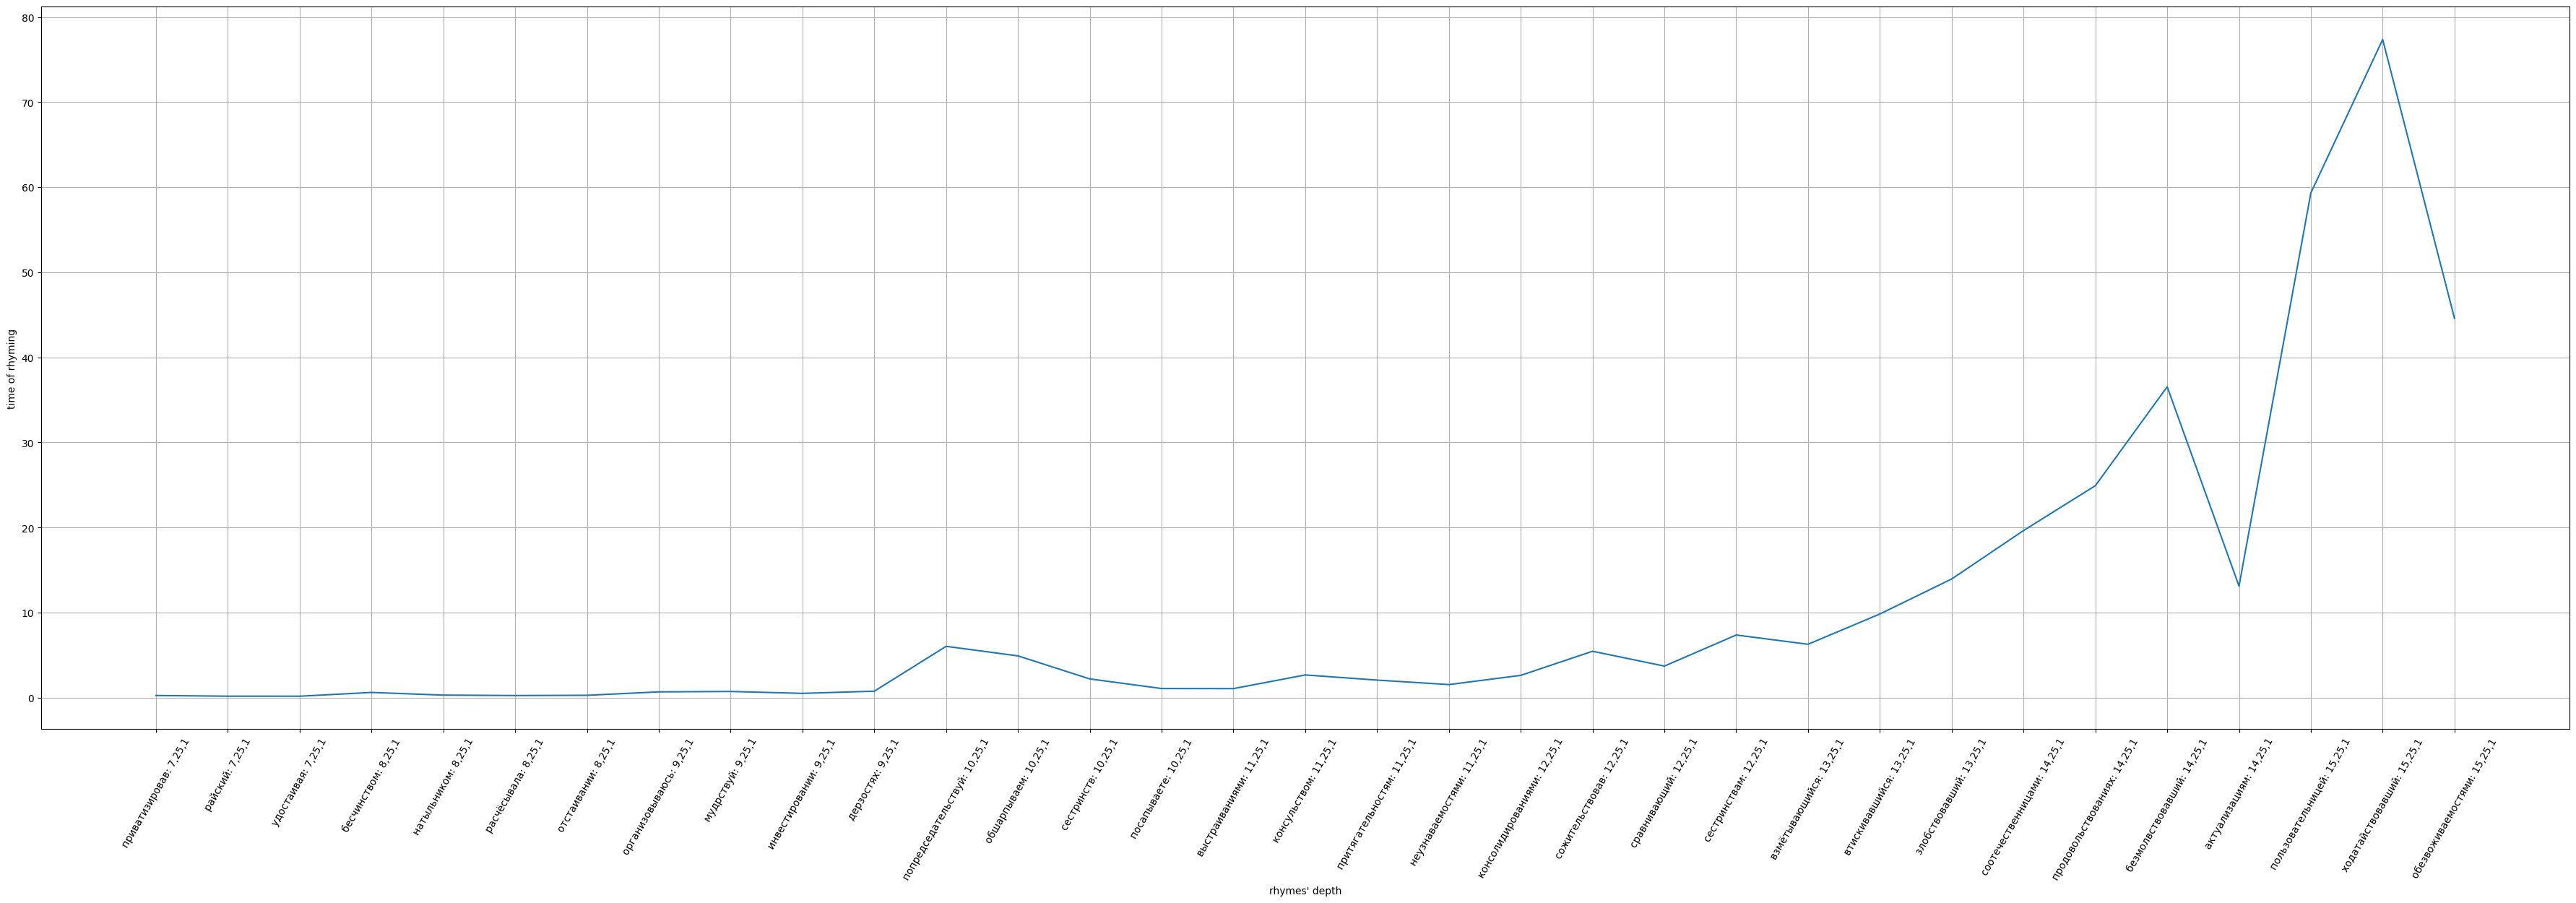

In [69]:
path_times = "time_words_over_7_score_00.pkl"
path_to_save = "chart_time_words_over_7_score_00.png"
draw_depth_vs_time(path_times, path_to_save)

# Different words rhyme vs time

In [113]:
def assess_rhyme_time(path_rhyme,
                      path_time,
                      list_word_without_stress, 
                      nested_list_score_numbers, 
                      list_max_number_hard_sounds_in_one_pat)  :
    
    if Path(path_time).exists() or Path(path_rhyme).exists():
        return "Either of files with this name exists"

    else:
        data = []
        with open(path_time, "wb") as f:
            dill.dump(data, f)
        with open(path_rhyme, "wb") as f:
            dill.dump(data, f)
                
        for word_without_stress in list_word_without_stress:
            max_length_pat_of_ipa = get_n_sounds_in_word_without_stress(word_without_stress)
            for max_number_hard_sounds_in_one_pat in list_max_number_hard_sounds_in_one_pat:
                    for list_score_numbers in nested_list_score_numbers: 
                        start = timer()
                        output = rhyme(
                            word_without_stress = word_without_stress,
                            max_length_pat_of_ipa = max_length_pat_of_ipa,
                            list_score_numbers = list_score_numbers,
                            max_number_hard_sounds_in_one_pat = max_number_hard_sounds_in_one_pat)
                        end = timer()
                        time_of_rhyming = end - start
                        
                        rhyming_data = tuple((time_of_rhyming, 
                                            word_without_stress, 
                                            max_length_pat_of_ipa, 
                                            list_score_numbers, 
                                            max_number_hard_sounds_in_one_pat))
                        
                        print(word_without_stress, rhyming_data, output)
                        
                        with open(path_time, "ab") as f:
                            dill.dump(rhyming_data, f)
                        with open(path_rhyme, "ab") as f:
                            dill.dump(output, f)
                        
    times = []
    rhymes = []
    with  open(path_time, "rb") as f:
        try:
            while True:
                times.append(dill.load(f))
        except EOFError:
            pass
         
    with  open(path_rhyme, "rb") as f:
        try:
            while True:
                rhymes.append(dill.load(f))
        except EOFError:
            pass
                    
    return times, rhymes




In [87]:
with open("progression_words_00.pkl", "rb") as f:
    progression_words = dill.load(f)

In [108]:
list_word_without_stress = [re.sub("'", "", item[0]) for item in progression_words if item[1][1] >= 7]
list_word_without_stress = list_word_without_stress[:-5]  
print(len(list_word_without_stress))
print(list_word_without_stress) 

33
['приватизировав', 'райский', 'удостаивая', 'бесчинством', 'натыльником', 'расчёсывала', 'отстаивании', 'организовываюсь', 'мудрствуй', 'инвестировании', 'дерзостях', 'попредседательствуй', 'обшарпываем', 'сестринств', 'посапываете', 'выстраиваниями', 'консульством', 'притягательностям', 'неузнаваемостями', 'консолидированиями', 'сожительствовав', 'сравнивающий', 'сестринствам', 'взмётывающийся', 'втискивавшийся', 'злобствовавший', 'соотечественницами', 'продовольствованиях', 'безмолвствовавший', 'актуализациям', 'пользовательницей', 'ходатайствовавший', 'обезвоживаемостями']


In [114]:
path_time = "time_words_over_7_score_00.pkl"
path_rhyme ="rhyme_words_over_7_score_00.pkl" 
nested_list_score_numbers = [range(15,30,5)]
list_max_number_hard_sounds_in_one_pat = [1]
print("path_time", path_time)
print("path_rhyme", path_rhyme)
print("list_word_without_stress", list_word_without_stress)
print("nested_list_score_numbers", [list(nested_list_score_numbers[0])])
print("list_max_number_hard_sounds_in_one_pat", list_max_number_hard_sounds_in_one_pat)


path_time time_words_over_7_score_00.pkl
path_rhyme rhyme_words_over_7_score_00.pkl
list_word_without_stress ['приватизировав', 'райский', 'удостаивая', 'бесчинством', 'натыльником', 'расчёсывала', 'отстаивании', 'организовываюсь', 'мудрствуй', 'инвестировании', 'дерзостях', 'попредседательствуй', 'обшарпываем', 'сестринств', 'посапываете', 'выстраиваниями', 'консульством', 'притягательностям', 'неузнаваемостями', 'консолидированиями', 'сожительствовав', 'сравнивающий', 'сестринствам', 'взмётывающийся', 'втискивавшийся', 'злобствовавший', 'соотечественницами', 'продовольствованиях', 'безмолвствовавший', 'актуализациям', 'пользовательницей', 'ходатайствовавший', 'обезвоживаемостями']
nested_list_score_numbers [[15, 20, 25]]
list_max_number_hard_sounds_in_one_pat [1]


In [115]:
times, rhymes = assess_rhyme_time(
                  path_rhyme,
                  path_time,
                  list_word_without_stress, 
                  nested_list_score_numbers, 
                  list_max_number_hard_sounds_in_one_pat)

Algorythm produces [15, 20, 25] of range(0, 105, 5) possible combinations
приватизировав (15.469533899999078, 'приватизировав', 7, range(15, 30, 5), 1)                   rhymes  \
0        специализирован   
1              дозировал   
2         гармонизировал   
3          детализировал   
4        конкретизировал   
5     коммерциализировал   
6       национализировал   
7         социализировал   
8        синхронизировал   
9         терроризировал   
10        гипнотизировал   
11         идеализировал   
12         иммунизировал   
13        отрецензировал   
14        перефразировал   
15         политизировал   
16       вульгаризировал   
17       прорецензировал   
18        актуализировал   
19        стабилизировал   
20      стандартизировал   
21         содомизировал   
22             газировал   
24      госпитализировал   
25        импровизировал   
26         минимизировал   
27         оптимизировал   
28        приватизировал   
29       проанализировал   
30      

In [76]:
times

[[],
 (0.2477987000002031, 'конь', 3, range(0, 10, 5), 1),
 (0.3318286000003354, 'бобр', 4, range(0, 10, 5), 1)]

In [77]:
rhymes

[[],
     rhymes                                  patterns part_speech  score
 0        К   (same_cons, same_stressed_v, same_cons)        noun      0
 1     конь   (same_cons, same_stressed_v, same_cons)        noun      0
 2  узаконь   (same_cons, same_stressed_v, same_cons)        verb      0
 3    огонь  (voice_cons, same_stressed_v, same_cons)        noun      5
 4   погонь  (voice_cons, same_stressed_v, same_cons)        noun      5,
   rhymes                                            patterns part_speech  \
 0   бобр  (same_cons, same_stressed_v, same_cons, same_cons)        noun   
 
    score  
 0      0  ]

# simple check

In [33]:
word_without_stress = "сестринство"
n_sounds = get_n_sounds_in_word_without_stress(word_without_stress)
print(n_sounds)

11


In [48]:
result = rhyme(
    word_without_stress,
    max_length_pat_of_ipa=n_sounds,
    list_score_numbers=[25],
    max_number_hard_sounds_in_one_pat=1,
    )
result

Algorythm produces [25] of range(0, 105, 5) possible combinations


,rhymes,patterns,part_speech,score
0,сестринств,"(same_cons, same_stressed_v, same_cons, same_cons, same_cons, same_v, same_cons, same_cons, same_cons, voice_cons, no_sound)",noun,25
1,сестринстве,"(same_cons, same_stressed_v, same_cons, same_cons, same_cons, same_v, same_cons, same_cons, same_cons, palatal_cons, any_v)",noun,25


In [40]:
test_data_0 = [1,2,3]
path = "test.pkl"
with open(path, "wb") as f:
    dill.dump(test_data_0, f)

In [43]:
test_data_1 = [4,5,6]
with open(path, "ab") as f:
    dill.dump(test_data_1, f)

In [46]:
test_result = []
with open(path, "rb") as f:
    try:
        while True:
            test_result.append(dill.load(f))
    except EOFError:
        pass
        
test_result

[[1, 2, 3], [4, 5, 6]]